<a href="https://colab.research.google.com/github/aadilganigaie/ML-project/blob/main/speaker_diarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installation

In [ ]:
!pip install -q pyannote.audio==1.1

     |████████████████████████████████| 230 kB 5.3 MB/s 
     |████████████████████████████████| 41 kB 240 kB/s 
     |████████████████████████████████| 56 kB 3.7 MB/s 
     |████████████████████████████████| 49 kB 5.7 MB/s 
     |████████████████████████████████| 129 kB 43.9 MB/s 
     |████████████████████████████████| 302 kB 41.2 MB/s 
     |████████████████████████████████| 80 kB 9.0 MB/s 
     |████████████████████████████████| 208 kB 46.8 MB/s 
     |████████████████████████████████| 75 kB 4.4 MB/s 
     |████████████████████████████████| 49 kB 5.1 MB/s 
     |████████████████████████████████| 111 kB 47.2 MB/s 
     |████████████████████████████████| 141 kB 48.3 MB/s 


In [ ]:
!wget -q http://groups.inf.ed.ac.uk/ami/AMICorpusMirror/amicorpus/ES2004a/audio/ES2004a.Mix-Headset.wav
DEMO_FILE = {'uri': 'ES2004a.Mix-Headset', 'audio': 'ES2004a.Mix-Headset.wav'}

In [ ]:
!wget -q https://raw.githubusercontent.com/pyannote/pyannote-audio/master/tutorials/data_preparation/AMI/MixHeadset.test.rttm

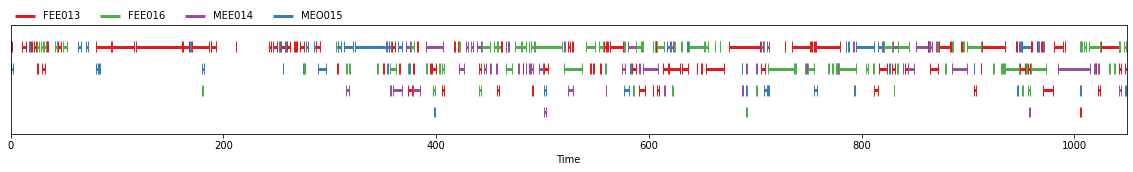

In [ ]:
# load groundtruth
from pyannote.database.util import load_rttm
groundtruth = load_rttm('MixHeadset.test.rttm')[DEMO_FILE['uri']]

# visualize groundtruth
groundtruth

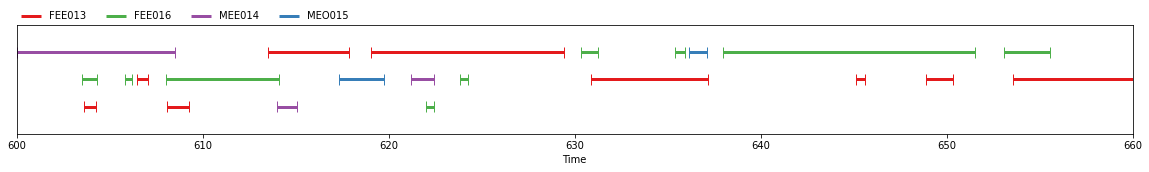

In [ ]:
from pyannote.core import Segment, notebook
# make notebook visualization zoom on 600s < t < 660s time range
EXCERPT = Segment(600, 660)
notebook.crop = EXCERPT

# visualize excerpt groundtruth
groundtruth

In [ ]:
from pyannote.audio.features import RawAudio
from IPython.display import Audio

# load audio waveform, crop excerpt, and play it
waveform = RawAudio(sample_rate=16000).crop(DEMO_FILE, EXCERPT)
Audio(data=waveform.squeeze(), rate=16000, autoplay=True)

## Upload audio file

In [ ]:
import google.colab
#own_file, _ = google.colab.files.upload().popitem()
own_file = 'Media2.wav'
OWN_FILE = {'audio': own_file}
notebook.reset()

# load audio waveform and play it
waveform = RawAudio(sample_rate=16000)(OWN_FILE).data
Audio(data=waveform.squeeze(), rate=16000, autoplay=True)

## Upload groundtruth (optional)


In [ ]:
groundtruth_rttm, _ = google.colab.files.upload().popitem()
groundtruths = load_rttm(groundtruth_rttm)
if OWN_FILE['audio'] in groundtruths:
  groundtruth = groundtruths[OWN_FILE['audio']]
else:
  _, groundtruth = groundtruths.popitem()
groundtruth

Saving newsou.wav to newsou (1).wav


UnicodeDecodeError: ignored

# Speaker diarization



In [ ]:
import torch
pipeline = torch.hub.load('pyannote/pyannote-audio', 'dia')
diarization = pipeline(OWN_FILE)

Using cache found in /root/.cache/torch/hub/pyannote_pyannote-audio_master
Using cache found in /root/.cache/torch/hub/pyannote_pyannote-audio_master
Using cache found in /root/.cache/torch/hub/pyannote_pyannote-audio_master
Using cache found in /root/.cache/torch/hub/pyannote_pyannote-audio_master
/usr/local/lib/python3.7/dist-packages/pyannote/audio/embedding/approaches/arcface_loss.py:170: FutureWarning:

The 's' parameter is deprecated in favor of 'scale', and will be removed in a future release

/usr/local/lib/python3.7/dist-packages/pyannote/audio/features/pretrained.py:156: UserWarning:

Model was trained with 4s chunks and is applied on 2s chunks. This might lead to sub-optimal results.

Using cache found in /root/.cache/torch/hub/pyannote_pyannote-audio_master


That's it? Yes, that's it :-)

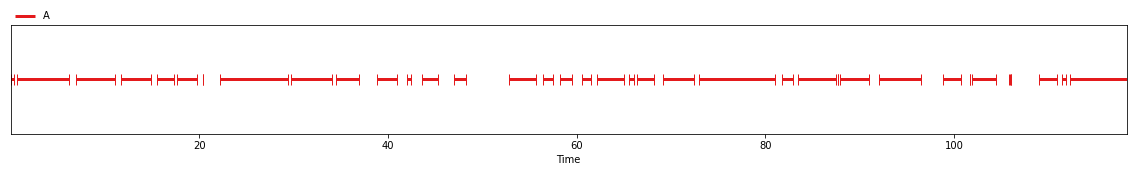

In [ ]:
diarization

# Evaluation with `pyannote.metrics`



In [ ]:
from pyannote.metrics.diarization import DiarizationErrorRate
metric = DiarizationErrorRate()
der = metric(groundtruth, diarization)

/usr/local/lib/python3.7/dist-packages/pyannote/metrics/utils.py:184: UserWarning:

'uem' was approximated by the union of 'reference' and 'hypothesis' extents.



In [ ]:
print(f'diarization error rate = {100 * der:.1f}%')

diarization error rate = 100.4%


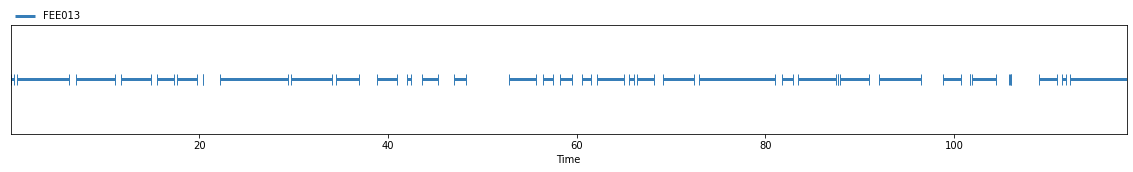

In [ ]:
mapping = metric.optimal_mapping(groundtruth, diarization)
diarization.rename_labels(mapping=mapping)

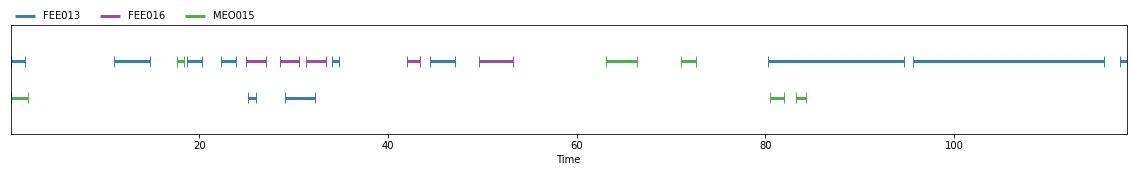

In [ ]:
groundtruth

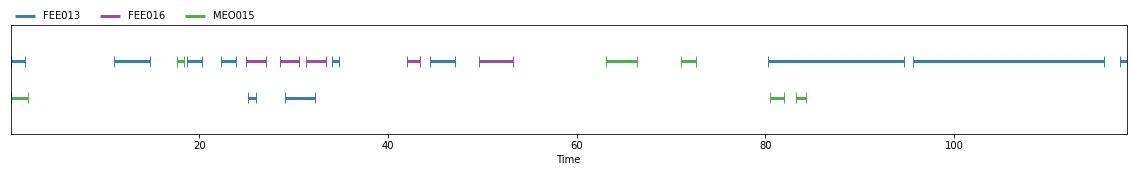

In [ ]:
groundtruth

Using cache found in /root/.cache/torch/hub/pyannote_pyannote-audio_master


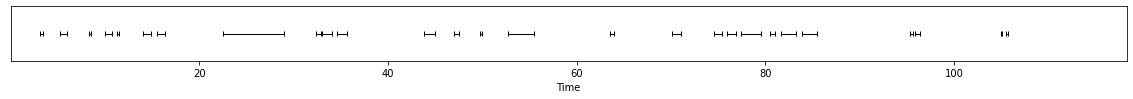

In [ ]:
overlap_detection = torch.hub.load('pyannote/pyannote-audio', 'ovl_ami', pipeline=True)
overlap_detection(OWN_FILE).get_timeline()

In [ ]:
!pip install Keras
!pip install hdbscan
!pip install librosa
!pip install matplotlib
!pip install numpy
!pip install sklearn
!pip install spectralcluster
!pip install tensorboard==1.15.0
!pip install tensorflow==1.15.0
!pip install tensorflow-gpu==1.15.0
!pip install umap-learn
!pip install pyannote.metrics

     |████████████████████████████████| 6.4 MB 22.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311883 sha256=222704000a3c0b5761d60eb90fec4fe9847aad44d3187a9228af7dcec306696f
  Stored in directory: /root/.cache/pip/wheels/73/5f/2f/9a259b84003b84847c259779206acecabb25ab56f1506ee72b
Successfully built hdbscan
     |████████████████████████████████| 3.8 MB 37.6 MB/s 
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.6.0
    Uninstalling tensorboard-2.6.0:
      Successfully uninstalled tensorboard-2.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires tensorboard~=2.6, but you have tensorboard 1.15.0 which is incompatible.
     |██████

In [ ]:
!pip install embeddings


In [ ]:
from embeddings import cluster_utils, consts, new_utils, toolkits
from visualization.viewer import PlotDiar

toolkits.initialize_GPU(consts.nn_params.gpu)

wav = new_utils.find_wav(consts.audio_dir)
specs, intervals = new_utils.slide_window(audio_path=wav,
                                          embedding_per_second=consts.slide_window_params.embedding_per_second,
                                          overlap_rate=consts.slide_window_params.overlap_rate)

embeddings = new_utils.generate_embeddings(specs)
embeddings = cluster_utils.umap_transform(embeddings)

predicted_labels = cluster_utils.cluster_by_hdbscan(embeddings)

reference = new_utils.reference(consts.audio_dir)
hypothesis = new_utils.result_map(intervals, predicted_labels)

der = new_utils.der(reference, hypothesis)

plot = PlotDiar(true_map=reference, map=hypothesis, wav=consts.audio_dir, gui=True, size=(24, 6))
plot.draw_true_map()
plot.draw_map()
plot.show()

new_utils.save_and_report(plot=plot, result_map=hypothesis, der=der['diarization error rate'])

ImportError: ignored